In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = UserWarning)

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.size


10692

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns=['Ticket', 'Cabin'], inplace=True)



In [7]:
df.dropna(subset=['Embarked'], inplace=True)

In [8]:
df.fillna({'Age': df['Age'].median()}, inplace=True)
df['Age'] = df['Age'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)

In [9]:
df.isnull().sum()
df.reset_index(drop=True, inplace=True)

In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,C


In [11]:
df.drop(columns=['Name'], inplace=True)


In [12]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,887,0,2,male,27,0,0,13.0000,S
885,888,1,1,female,19,0,0,30.0000,S
886,889,0,3,female,28,1,2,23.4500,S
887,890,1,1,male,26,0,0,30.0000,C


In [13]:
bins = [0,10,20,30,40,50,60,70,80]
group = ['0-10','10-20','20-30', '30-40','40-50','50-60','60-70','70-80']
df['age_groups'] = pd.cut(df['Age'], bins=bins, labels=group, right=False)

In [14]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_groups
0,1,0,3,male,22,1,0,7.2500,S,20-30
1,2,1,1,female,38,1,0,71.2833,C,30-40
2,3,1,3,female,26,0,0,7.9250,S,20-30
3,4,1,1,female,35,1,0,53.1000,S,30-40
4,5,0,3,male,35,0,0,8.0500,S,30-40
...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,male,27,0,0,13.0000,S,20-30
885,888,1,1,female,19,0,0,30.0000,S,10-20
886,889,0,3,female,28,1,2,23.4500,S,20-30
887,890,1,1,male,26,0,0,30.0000,C,20-30


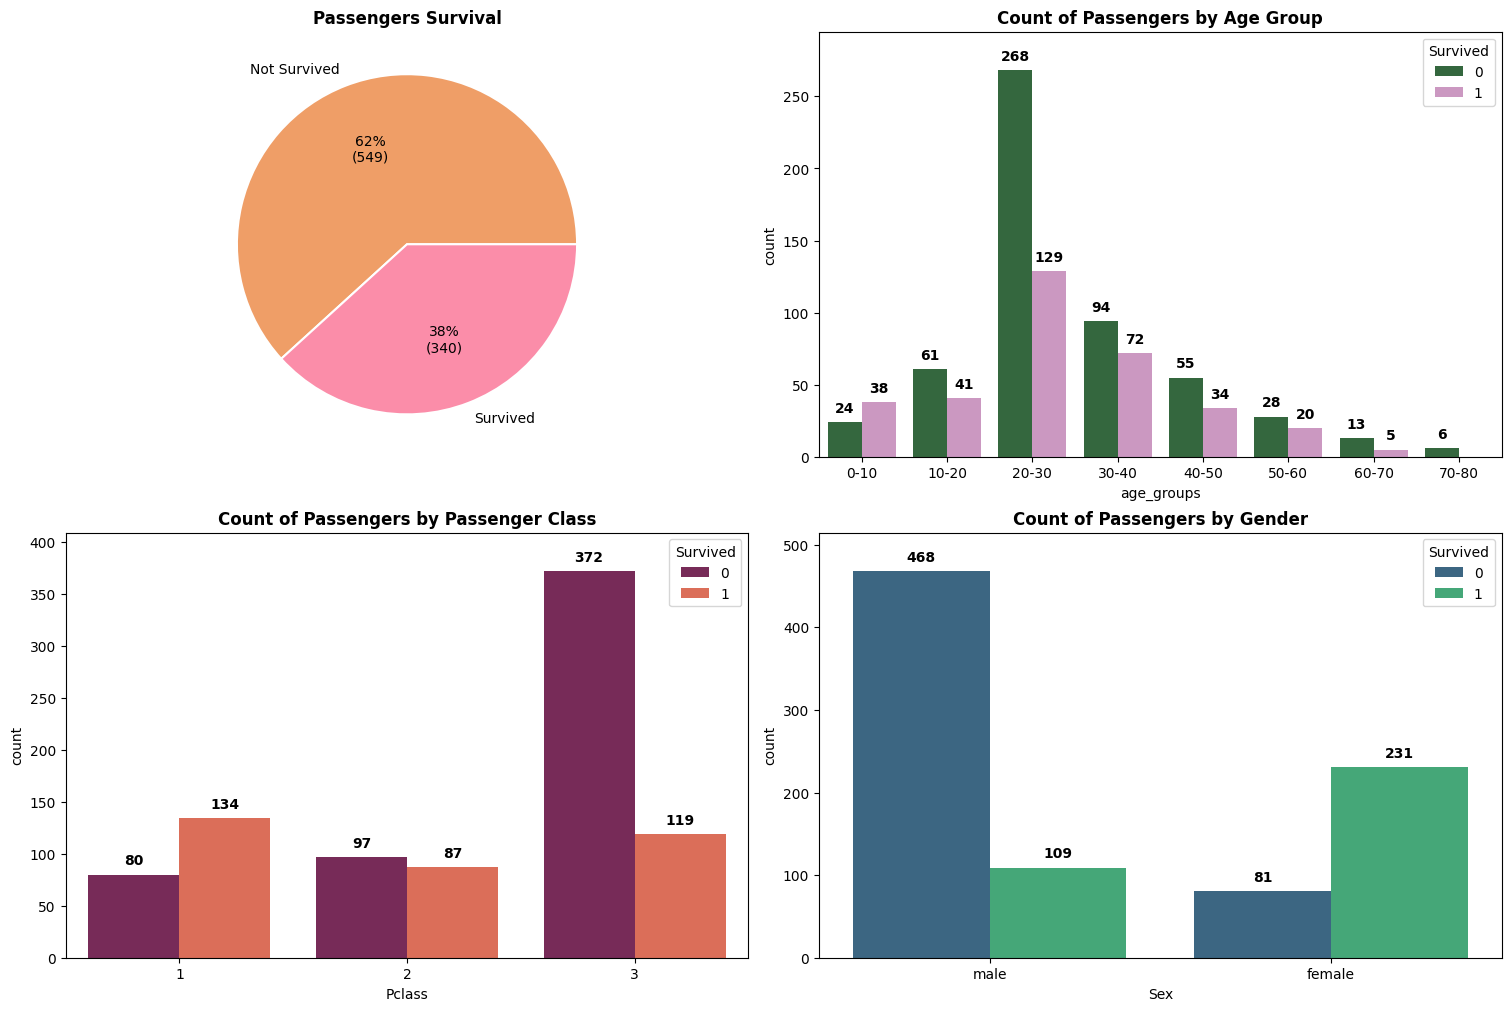

In [15]:
fig = plt.figure(layout="constrained", figsize=(15, 10))
axd = fig.subplot_mosaic(
    """
    AB
    CD
    """
)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.0f}%\n({val:d})'
    return my_format

def add_counts(ax, pad=10):
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, pad), textcoords='offset points', weight="bold")
    ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

survived_counts = df['Survived'].value_counts()
axd["A"].pie(survived_counts, labels=['Not Survived', 'Survived'], autopct=autopct_format(survived_counts), wedgeprops={
    "edgecolor": "white",
    'linewidth': 1.5}, colors=["#ef9e67", "#fb8da9"])

ax1 = sns.countplot(data=df, x="age_groups", hue="Survived", ax=axd["B"], palette='cubehelix')
ax2 = sns.countplot(data=df, x="Pclass", hue="Survived", ax=axd["C"], palette='rocket')
ax3 = sns.countplot(data=df, x="Sex", hue="Survived", ax=axd["D"], palette='viridis')

add_counts(ax1)
add_counts(ax2)
add_counts(ax3)

axd["A"].set_title("Passengers Survival", weight="bold")
axd["B"].set_title("Count of Passengers by Age Group", weight="bold")
axd["C"].set_title("Count of Passengers by Passenger Class", weight="bold")
axd["D"].set_title("Count of Passengers by Gender", weight="bold")

plt.show()

In [16]:
labelencoder = LabelEncoder()
df['Sex']= labelencoder.fit_transform(df['Sex'])
df['Embarked']= labelencoder.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_groups
0,1,0,3,1,22,1,0,7.2500,2,20-30
1,2,1,1,0,38,1,0,71.2833,0,30-40
2,3,1,3,0,26,0,0,7.9250,2,20-30
3,4,1,1,0,35,1,0,53.1000,2,30-40
4,5,0,3,1,35,0,0,8.0500,2,30-40


In [17]:
X = df[['Pclass','Sex','Age']]
Y = df['Survived']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression(random_state = 42)
model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [20]:
print(model.predict(X_test))

[0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1]


In [21]:
print(Y_test)

280    0
434    1
39     1
417    0
584    1
      ..
432    0
806    0
25     1
84     1
10     1
Name: Survived, Length: 178, dtype: int64


In [22]:
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred) * 100 
class_report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.4f}'+'%')
print("\n")
print('Classification Report:')
print(class_report)

Accuracy: 78.6517%


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [23]:
res = model.predict([[1,1,45]])

if(res == 0):
    print("The passanger didnot survived.")
else:
    print("The passanger survived.")


The passanger didnot survived.
